# Black-Scholes: Explicit Finite Difference

## Mathematics

The Black-Scholes partial differential equation for pricing an European call option, $V = V(S, t)$, is given by

\begin{equation} \label{eq:bs}
    \frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + (r - q)S \frac{\partial V}{\partial S} - rV = 0
\end{equation}

with boundary and final conditions

\begin{equation}
    V(0, t) = 0,
\end{equation}

\begin{equation}
    \lim_{S \to \infty} V(S, t) = S,
\end{equation}

\begin{equation}
    V(S, T) = \max(S - K, 0),
\end{equation}

where $S \in [0, \infty]$ is the stock price, $t \in [0, T]$ is the time, $\sigma$ is the stock volatility, $r$ is the continuous risk-free interest rate, $q$ is the continuous dividend yield and $K$ is the strike price.

We are going to discretize the Black-Scholes equation in order to solve it over an $N \times M$ grid with

\begin{equation}
    S = n \delta S, \;\;\; 0 \leq n \leq N
\end{equation}

\begin{equation}
    t = m \delta t, \;\;\; 0 \leq m \leq M
\end{equation}

\begin{equation}
    \delta S = \frac{S^*}{N}
\end{equation}

\begin{equation}
    \delta t = \frac{T}{M}
\end{equation}

where $S^*$ is a suitably large value of $S$. The idea is to chose a value of $S$ such that $\Gamma$ is approximately equal to zero (details in the [boundary conditions](#Boundary-and-final-conditions) section). We are going to compute $S^*$ as

\begin{equation}
    S^* = K e^{8 \sigma \sqrt{T}}.
\end{equation}

Therefore, we have

\begin{equation}
    V(S, t) = V(n \delta S, m \delta t).
\end{equation}

In the rest of this notebook, we will use the notation

\begin{equation}
    V(n \delta S, m \delta t) = V_n^m.
\end{equation}

### Theta

The partial derivative with respect to time, $\theta = \frac{\partial V}{\partial t}$, can be be approximated using a Taylor series expansion as

\begin{equation}
    V(S, t+ \delta t) = V(S, t) + \frac{\partial V}{\partial t} \delta t + \mathcal{O}(\delta t^2).
\end{equation}

Rearranging gives the value for $\theta$ as a forward difference

\begin{equation}
    \frac{\partial V}{\partial t} = \frac{V(S, t+ \delta t) - V(S, t)}{\delta t} + \mathcal{O}(\delta t).
\end{equation}

The backward difference is given by

\begin{equation}
    \frac{\partial V}{\partial t} = \frac{V(S, t) - V(S, t - \delta t)}{\delta t} + \mathcal{O}(\delta t).
\end{equation}

The finite difference form is therefore given by

\begin{equation} \label{eq:theta}
    \frac{\partial V}{\partial t}(n\delta S, m\delta t) \approx \frac{V_n^m - V_n^{m-1}}{\delta t}.
\end{equation}

### Delta

To approximate the values of $\Delta = \frac{\partial V}{\partial S}$ and $\Gamma = \frac{\partial^2 V}{\partial S^2}$, we consider the Taylor series expansion of $V$ around $S + \delta S$,

\begin{equation} \label{eq:ts_1}
    V(S + \delta S, t) = V(S, t) + \frac{\partial V}{\partial S}\delta S + \frac{1}{2} \frac{\partial^2 V}{\partial S^2} \delta S^2 + \mathcal{O}(\delta S^3),
\end{equation}

and around and $S - \delta S$,

\begin{equation} \label{eq:ts_2}
    V(S - \delta S, t) = V(S, t) - \frac{\partial V}{\partial S}\delta S + \frac{1}{2} \frac{\partial^2 V}{\partial S^2} \delta S^2 - \mathcal{O}(\delta S^3).
\end{equation}

Subtracting equation \eqref{eq:ts_2} from equation \eqref{eq:ts_1}, we obtain

\begin{equation}
    V(S + \delta S, t) - V(S - \delta S, t) = 2 \frac{\partial V}{\partial S}\delta S + \mathcal{O}(\delta S^3).
\end{equation}

Rearranging gives

\begin{equation}
    \frac{\partial V}{\partial S} = \frac{V(S + \delta S, t) - V(S - \delta S, t)}{2 \delta S} + \mathcal{O}(\delta S^2).
\end{equation}

Therefore, the finite difference form for $\Delta$ is 

\begin{equation} \label{eq:delta}
    \frac{\partial V}{\partial S}(n\delta S, m\delta t) \approx \frac{V_{n + 1}^m - V_{n - 1}^m}{2 \delta S}.
\end{equation}

### Gamma

Adding equation \eqref{eq:ts_2} and equation \eqref{eq:ts_1}, we obtain

\begin{equation}
    V(S + \delta S, t) + V(S - \delta S, t) = 2V(S, t) + \frac{\partial^2 V}{\partial S^2} \delta S^2 - \mathcal{O}(\delta S^4).
\end{equation}

Rearranging gives

\begin{equation}
    \frac{\partial^2 V}{\partial S^2} = \frac{V(S + \delta S, t) - 2V(S, t) + V(S - \delta S, t)}{\delta S^2} + \mathcal{O}(\delta S^2).
\end{equation}

Therefore, the finite difference form for $\Gamma$ is

\begin{equation} \label{eq:gamma}
    \frac{\partial^2 V}{\partial S^2}(n \delta S, m \delta t) \approx \frac{V_{n - 1}^m - 2 V_n^m + V_{n + 1}^m}{\delta S^2}.
\end{equation}

### Discrete Black-Scholes equation

Substituting equations \eqref{eq:theta}, \eqref{eq:delta} and \eqref{eq:gamma} into the Black-Scholes equation \eqref{eq:bs}, we obtain

\begin{equation}
    \frac{V_n^m - V_n^{m - 1}}{\delta t} + \frac{1}{2} n^2 \sigma^2 (V_{n-1}^m - 2V_n^m + V_{n+1}^m) + \frac{1}{2} (r - q)n(V_{n+1}^m - V_{n-1}^m) - rV_n^m = 0.
\end{equation}

We can rearrange the equation to solve for $V_n^{m-1}$ which is the only unknown. We obtain

\begin{equation}
    V_n^{m-1} = V_n^m + \delta t \left(\frac{1}{2} n^2 \sigma^2 (V_{n-1}^m - 2V_n^m + V_{n+1}^m)\right) + \delta t \left(\frac{1}{2} (r - q) n (V_{n+1}^m - V_{n-1}^m) - rV_n^m \right).
\end{equation}

Note that this is a backward marching scheme. We now collect the coefficients for each variable term $V$ to obtain

\begin{equation} \label{eq:diff}
    V_n^{m-1} = \alpha_n V_{n - 1}^m + \beta_n V_n^m + \gamma_n V_{n+1}^m
\end{equation}

where 

\begin{equation}
    \alpha_n = \frac{1}{2} \big( n^2 \sigma^2 - n(r-q) \big) \delta t,
\end{equation}

\begin{equation}
    \beta_n = 1 - (r + n^2 \sigma^2) \delta t,
\end{equation}

\begin{equation}
    \gamma_n = \frac{1}{2} \big( n^2 \sigma^2 + n(r-q) \big) \delta t.
\end{equation}

### Boundary and final conditions

For the lower boundary condition, we know that when $S = 0$, $n = 0$, $\alpha_0 = \gamma_0 = 0$, $\beta_0 = 1 - r \delta t$. Therefore, we have

\begin{equation}
    V_0^{m - 1} = (1 - r \delta t) V_0^m.
\end{equation}

For the upper boundary (i.e. when $n = N$), we cannot directly use equation \eqref{eq:diff} because $V_{N + 1}^m$ is not defined. To find the upper boundary condition, we can use the fact that $\Gamma$ vanishes for very large values of $S$. Indeed, we know that when $S \to \infty$ (i.e. $S^*$), $\Delta$ will not be sensitive to small changes in $S$ and $\Gamma \to 0$. Therefore, rearranging equation \eqref{eq:gamma} with $n = N$ and $\Gamma = 0$, we obtain

\begin{equation}
    V_{N + 1}^m = 2 V_N^m - V_{N-1}^m.
\end{equation}

Substituting in the difference equation gives

\begin{equation}
    V_N^{m-1} = (\alpha_N - \gamma_N) V_{N-1}^m + (\beta_N + 2\gamma_N)V_N^m.
\end{equation}

The final condition is simply

\begin{equation}
    V_n^M = \max(n \delta S - K, 0).
\end{equation}

### Fourier stability (Von Neumann's) method

The main disadvantage of the explicit scheme is that it is not unconditionally stable. Indeed, to prevent errors to propagate along the grid and grow exponentially, a stability condition must be met.

Let $\hat{V}_n^m$ be an approximation to the exact solution $V_n^m$. Then,

\begin{equation}
    \hat{V}_n^m = V_n^m + E_n^m
\end{equation}

where $E_n^m$ is the associated error. The error satisfies the PDE \eqref{eq:diff}, i.e.

\begin{equation} \label{eq:err_1}
    E_n^{m-1} = \alpha_n E_{n-1}^m + \beta_n E_n^m + \gamma_n E_{n+1}^m.
\end{equation}

Assume an initial disturbance proportional to $e^{in\omega}$ and set 

\begin{equation} \label{eq:err_2}
    E_n^m = \eta^m e^{in\omega}
\end{equation}

which is oscillatory with amplitude $\eta$ and frequency $\omega$. Note that $i = \sqrt{-1}$ is the imaginary unit. Substituting \eqref{eq:err_2} into \eqref{eq:err_1}, we get

\begin{equation}
    \eta^{m-1}e^{in\omega} = \alpha_n \eta^m e^{i(n-1)\omega} + \beta_n \eta^m e^{in\omega} + \gamma_n \eta^m e^{i(n+1)\omega}.
\end{equation}

Dividing through by $\eta^m e^{in\omega}$ gives

\begin{equation} \label{eq:stab}
    \eta^{-1} = \alpha_n e^{-i\omega} + \beta_n + \gamma_n e^{i\omega}.
\end{equation}

In the Black-Scholes equation, stability arises from the balancing of the time dependency and diffusion terms, so that

\begin{equation}
    \frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} = 0.
\end{equation}

Therefore, from $\alpha$, $\beta$ and $\gamma$, we choose the terms arising from $\theta$ and $\Gamma$. We get

\begin{equation}
    \alpha_n = \gamma_n = \frac{1}{2} n^2 \sigma^2 \delta t,
\end{equation}

\begin{equation}
    \beta_n = 1 - n^2 \sigma^2 \delta t.
\end{equation}

Substituting in \eqref{eq:stab}, we obtain

\begin{align}
    \eta^{-1} &= \frac{1}{2} n^2 \sigma^2 \delta t \left( e^{i\omega} + e^{-i\omega} \right) + 1 - n^2 \sigma^2 \delta t \\
    & = n^2 \sigma^2 \delta t (\cos \omega - 1) + 1 \\
    & = 1 - 2n^2 \sigma^2 \sin^2 \frac{\omega}{2} \delta t.
\end{align}

For stability, $\eta^{-1}$ must be bounded, i.e. $\left| \eta^{-1} \right| \leq 1$. This implies that

\begin{equation}
    \left|1 - 2n^2 \sigma^2 \sin^2 \frac{\omega}{2} \delta t \right| \leq 1,
\end{equation}

\begin{equation}
    -1 \leq 1 - 2n^2 \sigma^2 \sin^2 \frac{\omega}{2} \delta t \leq 1.
\end{equation}

The maximum value of $n$ is $N$ and the maximum value of the sin term is 1. Therefore, we have

\begin{equation}
    -1 \leq 1 - 2N^2 \sigma^2 \delta t \leq 1,
\end{equation}

\begin{equation}
    -2 \leq - 2N^2 \sigma^2 \delta t \leq 0,
\end{equation}

\begin{equation}
    1 \geq N^2 \sigma^2 \delta t \geq 0.
\end{equation}

This implies that our stability condition is 

\begin{equation}
    \delta t \leq \frac{1}{\sigma^2 N^2}.
\end{equation}

## Implementation

First, let's import some libraries and define a function for the explicit finite difference method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bs_fd_explicit(S_max, K, T, r, q, sigma, N, M):
    dt = T/M  
    if dt > 1/(N**2 * sigma**2):
        print('Stability condition not satified: might lead to numerical instability. Increase time grid size (M).')
    else:
        dS = S_max/N       
        n = np.arange(0, N+1, 1)         
        V = np.zeros((N+1, M+1))
        V[:, -1] = np.maximum(n*dS - K, 0)
        
        def alpha(n):
            return 0.5*(n**2*sigma**2 - n*(r-q))*dt        
        def beta(n):
            return 1 - (r + n**2*sigma**2)*dt        
        def gamma(n):
            return 0.5*(n**2*sigma**2 + n*(r-q))*dt
        
        for i in range(M, 0, -1):   
            V[-1, i-1] = (alpha(N) - gamma(N))*V[N-1, i] + (beta(N) + 2*gamma(N))*V[N, i]
            V[1:-1, i-1] = alpha(n[1:-1])*V[:-2, i] + beta(n[1:-1])*V[1:-1, i] + gamma(n[1:-1])*V[2:, i]
    
        return V, dS, dt

Now, let's define some parameters and compute the call option values.

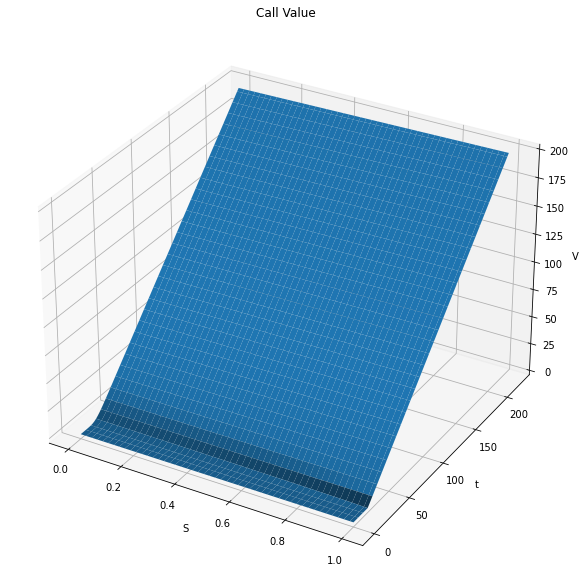

In [3]:
# Parameters
K = 20
T = 1
sigma = 0.3
S_max = int(K*np.exp(8*sigma*np.sqrt(T)))
r = 0.03
q = 0.02
N = 100
M = 1000

# Compute prices
V, dS, dt = bs_fd_explicit(S_max, K, T, r, q, sigma, N, M)

# Get t and S values
t = np.arange(0, T+dt, dt)
S = np.arange(0, S_max + dS, dS)
S, t = np.meshgrid(t, S)

# Plot the Call surface
fig = plt.figure(figsize=(10, 30))
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(S, t, V)
ax.set_xlabel('S')
ax.set_ylabel('t')
ax.set_zlabel('V')
ax.set_title('Call Value');